## PCA and Text Analysis

This assignment involves processing real e-mails, some of which are scams.

Fair warning: Some of these scam e-mails have offensive content. If you start reading the e-mail text or the token data, you might read something offensive. If that's a problem, feel free to e-mail me, and we can talk about it and discuss how to proceed with alternative tasks.

### Q1.

**Tokens**: The individual words or symbols that create text data like emails. Natural Language Processing is primarily about analyzing the frequency and co-occurrence of tokens.

I aggregated all the emails into a single vector, and removed the punctuation and very common words (e.g. "the"). Run the below code chunk to open it, and use the Counter class to look at the most common words:

In [ ]:
import pickle
with open('all_tokens.pickle', 'rb') as file:
    all_tokens = pickle.load(file)

from collections import Counter
token_count = Counter(all_tokens)
token_freq = token_count.most_common()
token_freq

[('new', 1365),
 ('date', 1202),
 ('get', 1052),
 ('please', 1022),
 ('enron', 927),
 ('like', 923),
 ('2002', 869),
 ('would', 806),
 ('one', 798),
 ('message', 795),
 ('call', 740),
 ('free', 691),
 ('software', 680),
 ('dear', 651),
 ('know', 644),
 ('email', 629),
 ('url:', 625),
 ('time', 609),
 ('start', 604),
 ('linguistics', 598),
 ('online', 591),
 ('need', 587),
 ('wrote:', 585),
 ('see', 554),
 ('conference', 553),
 ('language', 550),
 ('want', 548),
 ('empty', 546),
 ('hourahead', 526),
 ('list', 523),
 ('attached', 515),
 ('hello', 501),
 ('university', 500),
 ('2001', 489),
 ('information', 473),
 ('vince', 473),
 ('may', 461),
 ('good', 449),
 ('following', 448),
 ('hour', 446),
 ('2000', 442),
 ('business', 442),
 ('save', 423),
 ('first', 423),
 ('click', 423),
 ('best', 423),
 ('make', 421),
 ('com', 413),
 ('original', 410),
 ('offer', 405),
 ('meeting', 403),
 ('thanks', 397),
 ('mail', 395),
 ('use', 389),
 ('find', 386),
 ('papers', 383),
 ('http', 378),
 ('sent',

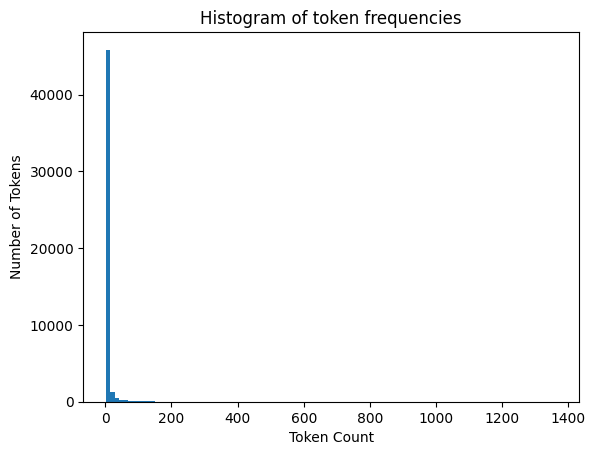

In [ ]:
import matplotlib.pyplot as plt


counts = list(token_count.values())
plt.figure()
plt.hist(counts, bins = 100)
plt.xlabel("Token Count")
plt.ylabel("Number of Tokens")
plt.title("Histogram of token frequencies")
plt.show()

Plot a histogram of the occurrences of tokens.

What do you notice about the frequency of occurrence of different tokens? How does it look?

The frequency of token occurrences is highly right skewed. A very large number of tokens appear only once or a few times, while only a small set of tokens appear very frequently. This creates a steep drop off in the histogram, where the first bin dominates the distribution. Overall, this pattern reflects a behavior that is typical in natural language where most words are rare and only a few are common words that occur very often.

### Q2.

Load `Phishing_clean.parquet`. This is the text from the e-mails broken into the most common 2,711 tokens and one-hot-encoded as features/covariates. So each row is an e-mail, the `Email Type` takes the value 1 if it's a scam and 0 otherwise, and every other column is a word or symbol that occurs in at least 15 e-mails.

1. Perform an 80/20 train-test split of the data.
2. Run a regression of $y$ on the one-hot-encoded emails. What is the $R^2$ on the test set? On the training set?
3. What words have the largest coefficients in absolute value and most strongly influence predictions?

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

# Load
df = pd.read_parquet('Phishing_clean.parquet', engine = 'pyarrow')

# Seperate label and features
y = df['Email Type'].astype(float).values
X = df.drop(columns=['Email Type'])
feature_names = X.columns.to_numpy()


In [ ]:
# 80/20 train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42,
                                                   stratify=y)

# Fit linear regression
model = Ridge(alpha=1.0, random_state=42)
model.fit(X_train, y_train)

# R^2 on train and test
r2_train = r2_score(y_train, model.predict(X_train))
r2_test = r2_score(y_test, model.predict(X_test))
print(f"R^2 on training set: {r2_train:.4f}")
print(f"R^2 on test set: {r2_test:.4f}")

R^2 on training set: 0.7703
R^2 on test set: 0.6532


The model achieved an r^2 of 0.77 on training and 0.65 on the test set.

In [ ]:
# Most influential tokens absolute value
coefs = model.coef_
abs_order = np.argsort(np.abs(coefs))[::-1]

top_k_abs = 25
top_abs = pd.DataFrame({
    'token': feature_names[abs_order[:top_k_abs]],
    'coef': coefs[abs_order[:top_k_abs]]
})
print("\nTop tokens by |coefficients| (strongest influence):")
print(top_abs.to_string(index=False))

# strongest positive and strongest negative
top_k_dir = 15
pos_idx = np.argsort(coefs)[-top_k_dir:]
neg_idx = np.argsort(coefs)[:top_k_dir]

top_pos = pd.DataFrame({'token': feature_names[pos_idx], 'coef': coefs[pos_idx]})
top_neg = pd.DataFrame({'token': feature_names[neg_idx], 'coef': coefs[neg_idx]})
print("\nTop positive tokens:")
print(top_pos.to_string(index=False))
print("\nTop negative tokens:")
print(top_neg.to_string(index=False))


Top tokens by |coefficients| (strongest influence):
            token      coef
background-image: -0.672844
        localized  0.654950
            form.  0.505712
           xanaax  0.477064
       girlfriend  0.458401
             cnet -0.451429
            aging  0.392635
             url: -0.390145
             para  0.388052
       transcript  0.366599
              utf  0.358815
         returned  0.354276
            lotto  0.351890
    forwarded-by: -0.351878
           yahoo! -0.336793
         excelled  0.335032
        satellite  0.315377
           ï¿½ï¿½  0.312215
              edu -0.299635
          goodbye  0.298108
              pro  0.290081
            zdnet -0.289806
           manage  0.286152
              que  0.285106
           dental  0.276918

Top positive tokens:
     token     coef
       pro 0.290081
   goodbye 0.298108
    ï¿½ï¿½ 0.312215
 satellite 0.315377
  excelled 0.335032
     lotto 0.351890
  returned 0.354276
       utf 0.358815
transcript 0.3665

The tokens with the largest coefficients in absolute value include terms like "xanaax", "girlfriend," "lotto," which strongly increase the likelihood of an email being classified as a scam, while tokens such as "background-image:" and "cnet" push predictions towards legitimate classification.

### Q3.

Take the matrix of one-hot-encoded tokens (the data, less the outcome variable, `Email Type`) and perform a principal components analysis decomposition with two components. Plot the first two principal components in a scatter plot, and hue the points by whether they are a phishing scam or not. Do you notice any patterns?

In [ ]:
from sklearn.decomposition import TruncatedSVD

df = pd.read_parquet('Phishing_clean.parquet', engine = 'pyarrow')

# outcome and features
y = df['Email Type'].astype(int).values
X = df.drop(columns=['Email Type'])

# pca with two components
from scipy.sparse import csr_matrix
X_sparse = csr_matrix(X.to_numpy(dtype='float32'))

svd = TruncatedSVD(n_components=2, random_state=42)
Z = svd.fit_transform(X_sparse)

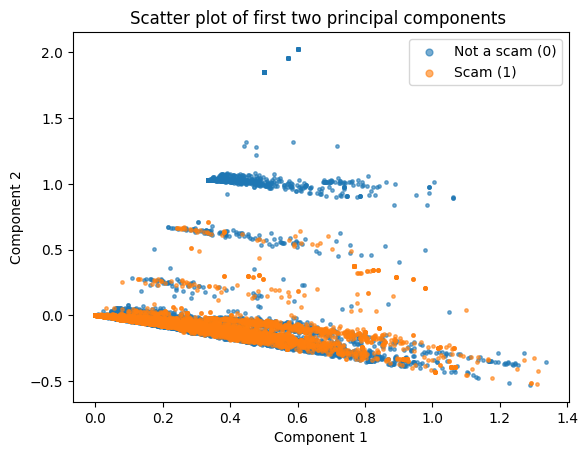

In [ ]:
is_scam = (y == 1)
is_not = (y == 0)
plt.figure()
plt.scatter(Z[is_not, 0], Z[is_not,1], s=6, alpha=0.6, label='Not a scam (0)')
plt.scatter(Z[is_scam, 0], Z[is_scam,1], s=6, alpha=0.6, label='Scam (1)')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Scatter plot of first two principal components ')
plt.legend(markerscale=2)
plt.show()

There is some weak separation between phishing and non phishing emails in the first two principal components. In particular, non scam emails tend to cluster in a few distinct horizontal bands, while phishing emails are more spread out and overlap across the lower part of the plot. This suggests that while certain token patterns differentiate legitimate vs scam emails, the first two components alone do not provide strong linear separation—consistent with the high dimensional and sparse nature of text data.

### Q4.

Run a linear regression of $y$ on the first 2,610 principal components of $X$. What is the $R^2$ on the training and test sets? (I used cross validation to determine that 2,610 was approximately optimal, but not all 2,711 components.)

How does this performance compare to the linear regression?

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score
from scipy.sparse import csr_matrix
from sklearn.model_selection import train_test_split


# Convert the existing splits to sparse
X_train_sparse = csr_matrix(np.asarray(X_train, dtype=np.float32))
X_test_sparse = csr_matrix(np.asarray(X_test, dtype=np.float32))

# PCA via TruncatedSVD with k = 2610
svd = TruncatedSVD(n_components=2610, random_state=42)
Z_train = svd.fit_transform(X_train_sparse)
Z_test = svd.transform(X_test_sparse)

# linear reg on the 2610 PCs
lin_2610 = LinearRegression()
lin_2610.fit(Z_train, y_train)


baseline = LinearRegression()
baseline.fit(X_train_sparse, y_train)
print(f"Baseline R^2 on training set: {baseline.score(X_train_sparse, y_train):.4f}")
print(f"Baseline R^2 on test set: {baseline.score(X_test_sparse, y_test):.4f}")
print(f"R^2 on training set: {lin_2610.score(Z_train, y_train):.4f}")
print(f"R^2 on test set: {lin_2610.score(Z_test, y_test):.4f}")


Baseline R^2 on training set: 0.7713
Baseline R^2 on test set: 0.6424
R^2 on training set: 0.7707
R^2 on test set: 0.6449


The linear regression model using the first 2,610 principal components achieves an R^2 of 0.7713 on the training set and 0.6424 on the test set. This performance is very similar to the linear regression model that used all one-hot-encoded features (R^2 = 0.7707 train and 0.6449 test). The training performance is essentially unchanged, while the test performance is only slightly lower, indicating that PCA retains most predictive information while using fewer features.

### Q5.

Explain briefly in your own words what the advantage is in using the principal components to run this high-dimensional regression, rather than the original data.

It reduces the dimensionality of the one-hot feature space and removes multicollinearity by making the predictors orthogonal. This simplifies the regression problem, helps prevent overfitting, and improves computational efficiency while still capturing most of the important variance int he data.